In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('measures_clean.csv')
df['record_id'].nunique()

122

In [3]:
df.columns

Index(['record_id', 'redcap_event_name', 'total_invites',
       'redcap_survey_identifier', 'partstatus', 'mini_timestamp',
       'mini_suicide_sum', 'mini_suicide_dx', 'mini_suicide_dx_2',
       'suicide_notes', 'suicide_protective', 'phq9_question_9_only_timestamp',
       'phq9_q9_only', 'phq9_question_9_only_complete',
       'columbia_suicide_questionnaire_timestamp', 'csrs_q1', 'csrs_q2',
       'csrs_q3', 'csrs_q4', 'csrs_q5', 'csrs_q6', 'csrs_q7', 'csrc_total',
       'columbia_risk_score', 'columbia_suicide_questionnaire_complete',
       'gad7_timestamp', 'gad_feel_nervous', 'gad_stop_worry',
       'gad_worry_too_much', 'gad_relaxing', 'gad_restless', 'gad_irritable',
       'gad_afraid', 'gad_difficult', 'gad_total_score', 'gad7_complete',
       'isi_timestamp', 'difficulty_falling_asleep',
       'difficulty_staying_asleep', 'problem_waking_up_early',
       'how_satisfied_dissatisfied', 'how_noticeable', 'how_worried',
       'current_interference', 'isi_total_score',

In [4]:
df_isi_gad = df.loc[(df['gad7_complete']==2) | (df['isi_complete']==2), ['record_id','redcap_event_name','partstatus','gad_total_score','isi_total_score']]
df_isi_gad

,record_id,redcap_event_name,partstatus,gad_total_score,isi_total_score
0,CF017AUD,baseline,complete,11.0,18.0
1,CF017AUD,week_3,complete,11.0,18.0
2,CF017AUD,week_6,complete,11.0,14.0
3,CF017AUD,week_10,complete,12.0,16.0
4,CF017AUD,week_14,complete,10.0,7.0
...,...,...,...,...,...
660,MM318AUD,week_6,active,7.0,17.0
662,MM318AUD,week_10,active,6.0,12.0
664,MM321AUD,baseline,active,21.0,26.0
665,MM321AUD,week_3,active,14.0,11.0


In [5]:
isi_gad_scores = df_isi_gad.groupby('redcap_event_name').agg({'gad_total_score':['mean','std'],'isi_total_score':['mean','std']}).reindex(['baseline','week_3','week_6','week_10','week_14'])
isi_gad_scores.round(decimals=2)

gad_total_score       isi_total_score      
                             mean   std            mean   std
redcap_event_name                                            
baseline                     7.02  5.21           16.92  5.40
week_3                       7.09  4.40           13.69  4.62
week_6                       7.59  4.85           12.33  5.36
week_10                      7.01  5.18           11.75  5.60
week_14                      6.20  4.47            9.98  5.47

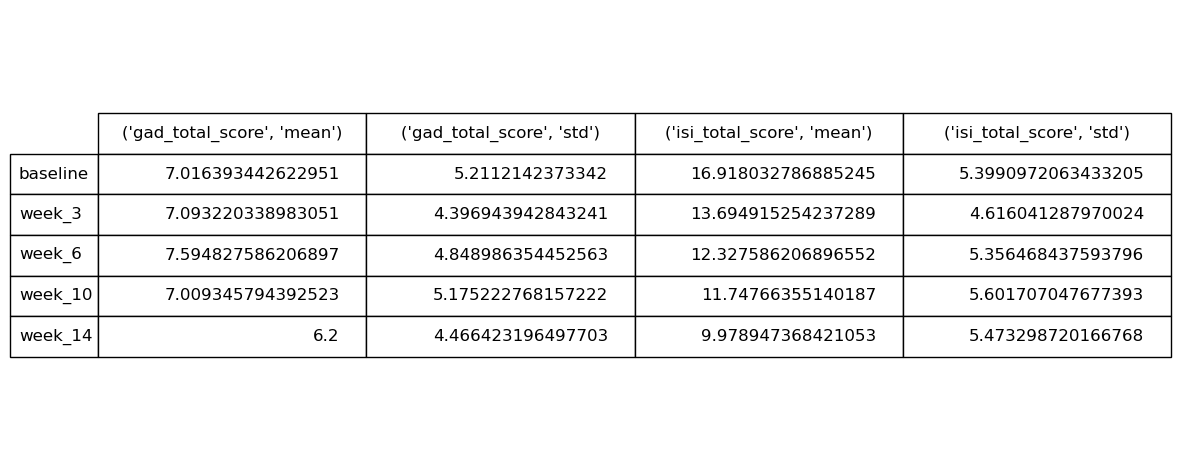

In [6]:
#define figure and axes
fig, ax = plt.subplots()

#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create table
table = ax.table(cellText=isi_gad_scores.values, rowLabels=isi_gad_scores.index, colLabels=isi_gad_scores.columns, loc='center')

#display table
fig.tight_layout()
table.set_fontsize(14)
table.scale(2,2)
plt.show()